# 한글 텍스트 분류
- 데이터 이름: Naver Sentiment Movie corpus v1.0
- 데이터 용도: 텍스트 분류 학습을 목적으로 사용한다.
- 데이터 권한: CCO 1.0
- 데이터 출처: https://github.com/e9t/nsmc

# 1. 문제 소개
### 1. 네이버 영화 리뷰 감정 분석
네이버 영화의 사용자 리뷰를 각 영화당 100개씩 모아서 만들어진 데이터. 감정의 경우에는 긍정 혹은 부정의 값을 가진다. 

# 2. 데이터 전처리 및 분석
[다운로드](https://github.com/e9t/nsmc)
- ratings.txt: 전체 리뷰를 모아둔 데이터, 전체 20만 개의 데이터로 구성돼 있다.
- ratings_train.txt: 학습 데이터 총 15만 개의 데이터로 구성돼 있다.
- ratings_test.txt: 평가 데이터 총 5만개의 데이터로 구성돼 있다.

##### 2-1 데이터 불러오기 및 분석하기

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
DATA_IN_PATH = './data_in/'
print('파일 크기: ')
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH+file) /1000000, 2)) +'MB')                   

파일 크기: 
ratings_test.txt              4.89MB
ratings.txt                   19.52MB
ratings_train.txt             14.63MB


In [3]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t',quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 150000


In [5]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

이제 이 변수를 사용해 전체 데이터에 대해 길이에 대한 히스토그램을 그린다.

/Users/keemyohaan/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


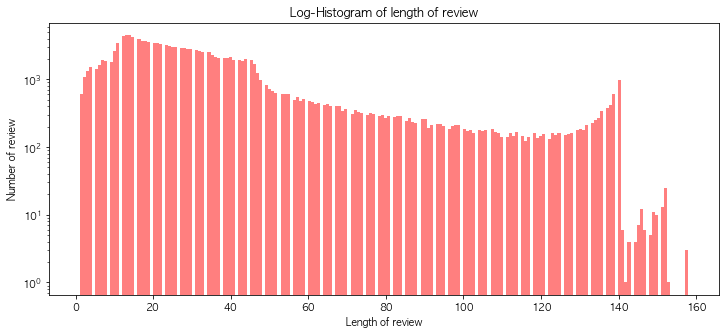

In [6]:
# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')

plt.show()

길이를 보면 매우 짧은 길이부터 140자까지 고르게 분포돼 있다. 조금 특이한 부분보통 20자 이하에 많이 분포돼 있다가 길이가 길어질수록 점점 수가 적어지는데, 140자 부근에서 데이터의 수가 갑자기 많아지는 것을 볼 수 있다. 해당 데이터의 경우 140자 제한 (한글 기준)이 있는 데이터이기 때문에 최대 글자수에 조금 모여 있는 형태다. 

In [7]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


길이의 최대값은 158이다. 최대 글자 수가 140이지만 특수 문자 등으로 인해 좀 더 긴 데이터도 포함 돼 있다. 최솟값은 1이고 평균의 경우 35자 정도 된다. 중간값은 27자로 평균보다 좀 더 작은 값을 가진다.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa744477210>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa744477a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa744379d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa744472390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa744472c10>],
 'means': [<matplotlib.lines.Line2D at 0x7fa7444727d0>]}

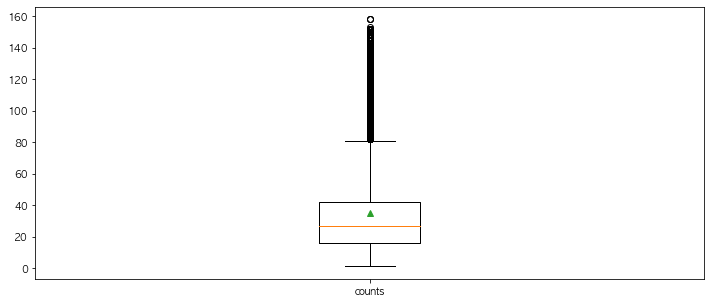

In [8]:
plt.figure(figsize=(12,5))
# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length, labels=['counts'], showmeans=True)

그림을 보면 일부 길이가 긴 데이터가 꽤 있다는 것을 확인할 수 있다. 중간값과 평균 값은 전체 데이터로 보면 아래쪽에 위치한다. 

이제 데이터에서 자주 사용된 어휘를 알아보기 위해 어휘 빈도 분석을 해보자. 이전 영어 데이터를 분석했을 때와 마찬가지로 워드클라우드를 사용한다. 우선 데이터 안에 들어있는 문자열이 아닌 데이터는 모두 제거한다. 어휘 빈도 분석은 문자열에 대해서만 진행할 수 있기 때문에 다른 형식이 있다면 오류가 발생할 수 있다.

In [9]:
train_review = [review for review in train_data['document'] if type(review) is str]

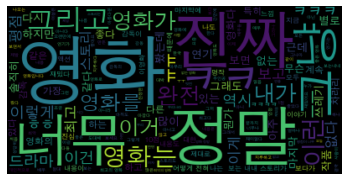

In [16]:
wordCloud = WordCloud(font_path=DATA_IN_PATH + '/System/Library/Fonts/Supplemental/AppleGothic.ttf').generate(' '.join(train_review))

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

/Users/keemyohaan/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


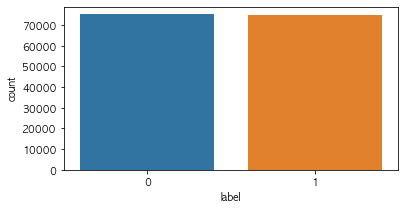

In [17]:
fig,axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])
plt.show()

In [18]:
print('긍정 리뷰 개수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


/Users/keemyohaan/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


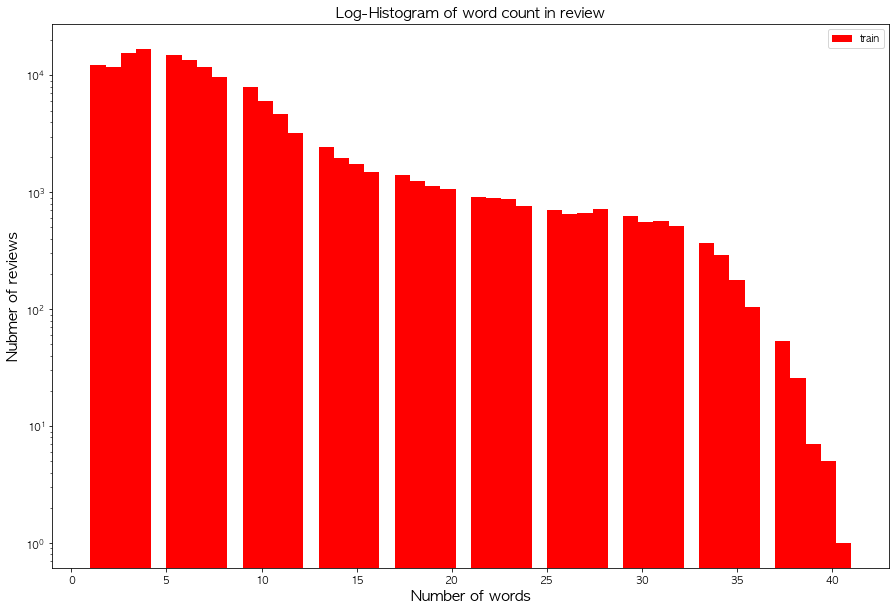

In [21]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label = 'train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()

plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Nubmer of reviews', fontsize=15)
plt.show()

In [23]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
# 사분위에 대한 경우는 0 ~ 100 스케일로 돼 있음
print('리뷰 단어 개수 최댓값: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 최댓값: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최솟값: 1
리뷰 단어 개수 평균값: 7.58494
리뷰 단어 개수 표준편차: 6.514041131514803
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 최댓값: 3.0
리뷰 단어 개수 최댓값: 9.0


In [24]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표

print('물음표가 있는 질문: {:.2f}%'.format(qmarks*100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop*100))

물음표가 있는 질문: 8.25%
마침표가 있는 질문: 51.76%


##### 2-2 데이터 전처리

In [26]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

DATA_IN_PATH = './data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3)

In [27]:
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [29]:
review_text = re.sub("[^가-힣ㄱ-ㅎ ㅏ-ㅣ\\s]", '', train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [30]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [33]:
stop_words = set(['은','는','이','가','하','아','것','것','들','의','있','되','수','보',
                 '주','등','한'])

clean_review = [token for token in review_text if not token in stop_words]
clean_review 

['더빙', '진짜', '짜증나다', '목소리']

In [35]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review: 전처리할 텍스트
    # okt: okt 객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    # remove_stopwords: 불용어를 제거할지 여부 선택, 기본값은 False
    # stop_word: 불용어 사전은 사용자가 직접 입력해야 함. 기본값은 빈 리스트
    
    # 1. 한글 및 공백을 제외한 문자를 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해 형태소 단위를 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        #불용어 제거 (선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
    return word_review

In [38]:
from tqdm import tqdm_notebook

너무 오래 걸리는 것 같아서 원본과 다르게 tqdm을 추가함

In [39]:
stop_words = '은 는 이 가 하 아 것 들 의 있 되 수 보 주 동 한'.split(' ')
okt = Okt()
clean_train_review = []

for i in tqdm_notebook(range(len(train_data))):
    review = train_data['document'][i]
    # 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True,
                                               stop_words = stop_words))
        
    else:
        clean_train_review.append([]) # string이 아니면 비어있는 값 추가
        
clean_train_review[:4] # 앞의 4개의 데이터 확인

/Users/keemyohaan/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

오타가 있는 것이 보이지만 전체 데이터에 대해 모두 수정할 수 없으니 어쩔 수 없는 부분으로 생각하고 넘어간다.

In [41]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t',
                        quoting=3)

clean_test_review = []

for i in tqdm_notebook(range(len(test_data))):
    review = test_data['document'][i]
    # 빈 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True,
                                              stop_words=stop_words))
    else:
        clean_test_review.append([]) # string이 아ㅏ니면 비어 있는 값 추가


/Users/keemyohaan/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


이제 핛급 데이터와 평가 데이터에 대해 인덱스 벡터로 바꾼 후 패딩 처리만 하면 모든 전처리 과정이 끝난다. 텐서플로의 전처리 모듈을 사용하는데 ***토크나이징 객체***를 만든 후 학습 데이터에 대해서만 적용하고 해당 객체를 사용해 두 데이터를 ***인덱스 벡터***로 만들자. 그 다음 마지막으로 해당 데이터들을 ***패딩처리***하면된다.


In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 시전 형태

MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

# 학습 데이터를 벡터화
train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨 

# 평가 데이터를 벡터화
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_labels = np.array(test_data['label']) # 평가 데이터의 라벨

패딩 처리를 할 떄 최대 길이를 8로 정했는데 이는 이전에 데이터 분석 과정에서 단어의 평균 개수가 대략 8개 정도였기 때문이다. 이처럼 학습 데이터와 평가 데이터에 대해 입력값과 라벨값을 만들었다면 해당 데이터들을 모델링 과정에서 사용할 수 있게 저장해두자.

In [48]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) +1 # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
# 전처리된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 전처리된 평가 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)



전처리 과정이 모두 끝났다. 넘파이 배열은 지정한 경로에 nsmc_train_input.npy와 nsmc_train_label.npy로 각각 저장된다. 이제 전처리한 데이터를 활용해 감정 분석을 할 수 있는 모델을 만들어 보자.

# 3. 모델링
한글 데이터를 정제하고, 각 단어들을 벡터화한 후 넘파이 파일로 저장했다. 벡터화된 데이터는 글자들이 숫자로 이미 표현됐기 때문에 영어와 한글에 큰 차이가 없을 것이다. 따라서 모델링 과정도 앞의 5.1.3절에서 살펴본 영어 텍스트 분류의 모델링과 비슷하다.

### 3-1 실습할 모델 소개
딥러닝 방식의 모델 중 합성곱 신경망(CNN)을 활용해 모델링하는 것만 소개할 것이다. 

### 3-2 학습 데이터 불러오기


In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import json

from tqdm import tqdm

전처리한 데이터를 불러오자

In [51]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

### 3-3 파라미터 정의
모델에 필요한 하이퍼파라미터를 정의해보자. ***모델 학습 설정, 모델 레이어 차원 수 등***으로 나누고 학습을 위한 배치 크기 등은 변수로 지정한 후 모델에 필요한 내용은 모델 __init__ 함수의 파라미터에 입력하기 위해 dict 객체로 정의한다.

In [76]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension': 1}

모델에 필요한 하이퍼파라미터 값으로 에폭 수, 배치 크기, 단어 사전의 크기, 임베딩 크기를 지정한다.

### 3-4 모델 함수
이전에 영어 텍스트 분류에서 사용했던 모델 중 합성곱 신경망 모델을 사용한다. 대부분의 구조는 기존에 사용했던 것과 동일하다. 한 가지 다른 점은 여기서는 모델을 깊게 구축하지 않는다는 점이다. 빠른 학습을 위한 목적도 있고 캐글 모델과 달리 성능 향상이 목적이 아닌 한글 데이터를 다뤄 보는 것이기 때문에 간단하게 구현한다.

In [77]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim = kargs['vocab_size'],
                                          output_dim = kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                             kernel_size = kernel_size,
                                             padding='valid',
                                             activation = tf.keras.activations.relu,
                                             kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.))
                         for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units = kargs['hidden_dimension'],
                               activation = tf.keras.activations.relu,
                               kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                                     activation=tf.keras.activations.sigmoid,
                                     kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

### 3-5 모델 학습

In [78]:
from tensorflow import keras

In [79]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

검증 정확도를 통한 EarlyStopping 기능과 모델 저장 방식을 지정하고, 모델을 검증하기 위한 검증 데이터도 model.fit 안에 있는 validation_split로 지정한 다음 학습을 시작한다.

In [80]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta = 0.0001, patience=2)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create paht if exsits
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok = True)
    print("{} --Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose =1, save_best_only=True,
    save_weights_only = True)

history = model.fit(train_input, train_label, batch_size= BATCH_SIZE, epochs=NUM_EPOCHS,
                   validation_split=VALID_SPLIT, callbacks = [earlystop_callback, cp_callback])



./data_out/cnn_classifier_kr -- Folder already exists 

Epoch 1/10
264/264 [==============================] - 21s 74ms/step - loss: 0.4583 - accuracy: 0.7754 - val_loss: 0.3909 - val_accuracy: 0.8219

Epoch 00001: val_accuracy improved from -inf to 0.82187, saving model to ./data_out/cnn_classifier_kr/weights.h5
Epoch 2/10
264/264 [==============================] - 18s 70ms/step - loss: 0.3521 - accuracy: 0.8460 - val_loss: 0.3802 - val_accuracy: 0.8261

Epoch 00002: val_accuracy improved from 0.82187 to 0.82613, saving model to ./data_out/cnn_classifier_kr/weights.h5
Epoch 3/10
264/264 [==============================] - 19s 72ms/step - loss: 0.2990 - accuracy: 0.8733 - val_loss: 0.3906 - val_accuracy: 0.8275

Epoch 00003: val_accuracy improved from 0.82613 to 0.82747, saving model to ./data_out/cnn_classifier_kr/weights.h5
Epoch 4/10
264/264 [==============================] - 19s 71ms/step - loss: 0.2546 - accuracy: 0.8945 - val_loss: 0.4180 - val_accuracy: 0.8247

Epoch 00004: val_ac

In [81]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string],'')
    plt.xlabel('Epochs')
    plt.ylabel('string')
    plt.legend([string, 'val_'+string])
    plt.show()

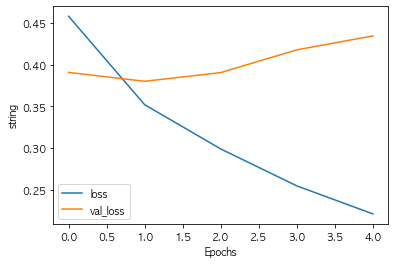

In [82]:
plot_graphs(history, 'loss')

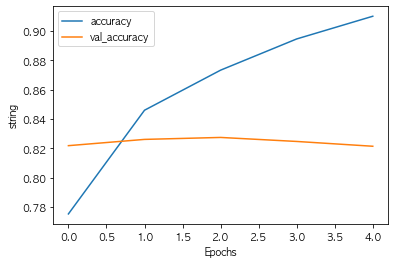

In [83]:
plot_graphs(history, 'accuracy')

### 3-6 모델 테스트
영어 모델의 경우 테스트 데이터에는 감정에 대한 라벨 값이 없었기 때문에 예측값만 만든 후 캐글에 제출해서 정확도를 확인해야 했지만 한글 데이터의 경우 라벨 값이 있기 때문에 검증 과정처럼 바로 결과를 확인할 수 있다.

우선 테스트 데이터를 불러오자. 학습 데이터를 전처리하는 과정과 동일하게 진행한 후 넘파이 파일로 저장한 데이터를 불러오면 된다.

In [85]:
DATA_OUT_PATH = './data_out/'
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

이전에는 테스트 과정에서 예측 메소드를 활용해서 출력값만 뽑았지만 여기서는 테스트 데이터가 라벨을 가지고 있으므로 검증 함수를 이용해 확인할 수 있다. 가중치를 불러오고 테스트 데이터, 라벨을 넣고 평가를 수행해보자

In [87]:
model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 2s 1ms/step - loss: 0.3916 - accuracy: 0.8266


[0.3916134834289551, 0.8266000151634216]